In [1]:
# !git clone https://deepraj1729@bitbucket.org/jadslim/german-traffic-signs.git 

In [1]:
!ls german-traffic-signs/

signnames.csv
test.p
train.p
valid.p


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle
import pandas as pd
import random

Using TensorFlow backend.


In [3]:
np.random.seed(0)

In [4]:
with open("german-traffic-signs/train.p","rb") as f:
    train_data = pickle.load(f)

with open("german-traffic-signs/valid.p","rb") as f:
    val_data = pickle.load(f)

with open("german-traffic-signs/test.p","rb") as f:
    test_data = pickle.load(f)


In [5]:
x_train,y_train = train_data['features'],train_data['labels']
x_val,y_val = val_data['features'],val_data['labels']
x_test,y_test = test_data['features'],test_data['labels']

In [6]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [7]:
assert(x_train.shape[0]==y_train.shape[0]), "The number of training images in not equal to the number of training labels"
assert(x_val.shape[0]==y_val.shape[0]), "The number of validating images in not equal to the number of validating labels"
assert(x_test.shape[0]==y_test.shape[0]), "The number of testing images in not equal to the number of testing labels"

In [8]:
df = pd.read_csv("german-traffic-signs/signnames.csv")

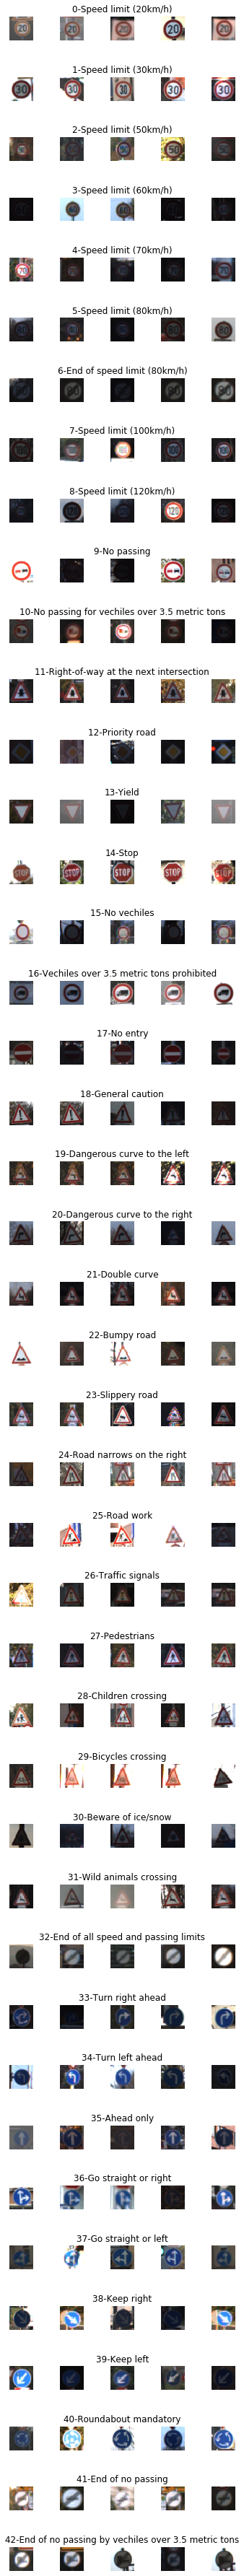

In [9]:
num_of_samples = []

cols= 5
num_of_classes = 43

fig,axs = plt.subplots(nrows=num_of_classes,ncols=cols,figsize = (5,50))
fig.tight_layout()

for i in range(cols):
    for j,row in df.iterrows():
        x_selected = x_train[y_train==j]
        axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected)-1)), :, :],cmap = plt.get_cmap('gray'))
        axs[j][i].axis('off')
        if i==2:
            axs[j][i].set_title(str(j)+"-"+row['SignName'])
            num_of_samples.append(len(x_selected))



[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


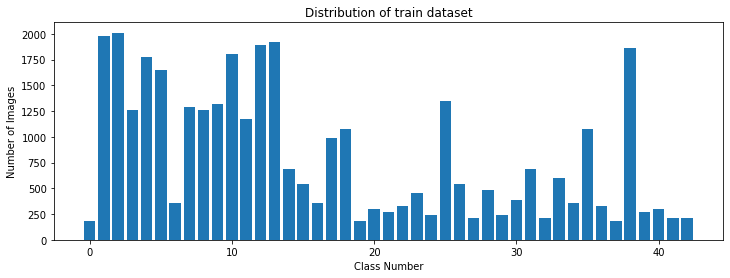

In [10]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_of_classes),num_of_samples)
plt.title("Distribution of train dataset")
plt.xlabel("Class Number")
plt.ylabel("Number of Images")
plt.show()

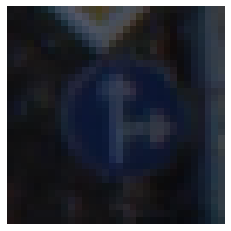

(32, 32, 3)
36


In [11]:
import cv2

plt.imshow(x_train[1000])
plt.axis('off')
plt.show()
print(x_train[1000].shape)
print(y_train[1000])

In [12]:
def grayscale(img):
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    return gray

(32, 32)


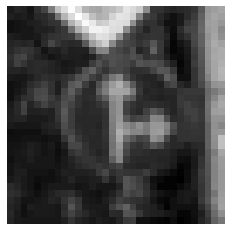

In [13]:
img = grayscale(x_train[1000])

plt.imshow(img,cmap='gray')
plt.axis('off')
print(img.shape)

(32, 32)


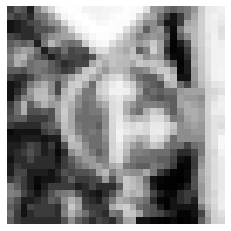

In [14]:
def equalize(img):
    equalimg = cv2.equalizeHist(img)
    return equalimg

img = equalize(img)

plt.imshow(img,cmap='gray')
plt.axis('off')
print(img.shape)

In [15]:
def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img


x_train = np.array(list(map(preprocessing,x_train)))
x_val = np.array(list(map(preprocessing,x_val)))
x_test = np.array(list(map(preprocessing,x_test)))

(-0.5, 31.5, 31.5, -0.5)

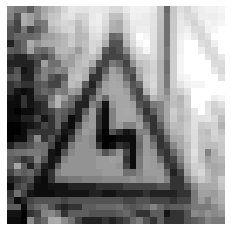

In [16]:
plt.imshow(x_train[random.randint(0,len(x_train)-1)],cmap='gray')
plt.axis('off')

In [17]:
#train
num_of_train_images = x_train.shape[0]

#validation
num_of_val_images = x_val.shape[0]

#testing
num_of_test_images = x_test.shape[0]

height = 32
width = 32
channels = 1

#reshape for CNN input
x_train = x_train.reshape(num_of_train_images,height,width,channels)
x_val = x_val.reshape(num_of_val_images,height,width,channels)
x_test = x_test.reshape(num_of_test_images,height,width,channels)

In [18]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(34799, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


In [19]:
y_train = to_categorical(y_train,43)
y_val = to_categorical(y_val,43)
y_test = to_categorical(y_test,43)

In [20]:
print(y_train.shape)

(34799, 43)


In [21]:
def leNet_model():
    model = Sequential()
    model.add(Conv2D(60,(5,5),input_shape = (height,width,channels),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(30,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(500,activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(43,activation='softmax'))

    #compile
    model.compile(Adam(lr = 0.001),loss='categorical_crossentropy',metrics = ['accuracy'])

    return model

def leNet_Complex_model():
    model = Sequential()
    model.add(Conv2D(60,(5,5),input_shape = (height,width,channels),activation='relu'))
    model.add(Conv2D(60,(5,5),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(30,(3,3),activation='relu'))
    model.add(Conv2D(30,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(500,activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(43,activation='softmax'))

    #compile
    model.compile(Adam(lr = 0.001),loss='categorical_crossentropy',metrics = ['accuracy'])

    return model

In [22]:
# model = leNet_model()
model = leNet_Complex_model()

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 30)         

In [24]:
history = model.fit(x_train,y_train,epochs=20,validation_data=(x_val,y_val),batch_size=400,verbose=1,shuffle=1)

Train on 34799 samples, validate on 4410 samples
Epoch 1/20
34799/34799 [==============================] - 37s 1ms/step - loss: 2.4657 - accuracy: 0.3398 - val_loss: 0.7794 - val_accuracy: 0.7927
Epoch 2/20
34799/34799 [==============================] - 13s 364us/step - loss: 0.7213 - accuracy: 0.7786 - val_loss: 0.3225 - val_accuracy: 0.9098
Epoch 3/20
34799/34799 [==============================] - 13s 374us/step - loss: 0.3861 - accuracy: 0.8822 - val_loss: 0.1873 - val_accuracy: 0.9429
Epoch 4/20
34799/34799 [==============================] - 13s 370us/step - loss: 0.2730 - accuracy: 0.9151 - val_loss: 0.1478 - val_accuracy: 0.9585
Epoch 5/20
34799/34799 [==============================] - 13s 372us/step - loss: 0.2193 - accuracy: 0.9322 - val_loss: 0.1261 - val_accuracy: 0.9669
Epoch 6/20
34799/34799 [==============================] - 13s 366us/step - loss: 0.1779 - accuracy: 0.9464 - val_loss: 0.1046 - val_accuracy: 0.9696
Epoch 7/20
34799/34799 [==============================] - 1

Text(0, 0.5, 'Loss')

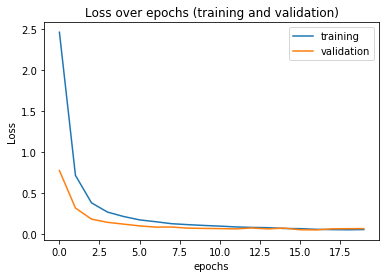

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss over epochs (training and validation)')
plt.xlabel("epochs")
plt.ylabel("Loss")

Text(0, 0.5, 'Accuracy')

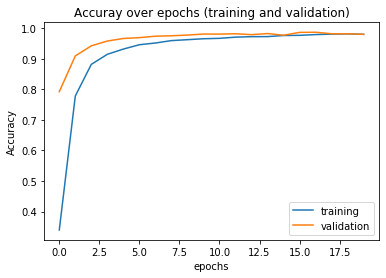

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuray over epochs (training and validation)')
plt.xlabel("epochs")
plt.ylabel("Accuracy")

In [27]:
#Evaluate on test data
score = model.evaluate(x_test,y_test,verbose=0)
print('Test Score = ',score[0])
print('Test accuracy = ',score[1])

Test Score =  0.11802165548994427
Test accuracy =  0.966587483882904


In [28]:
path = r"saved_model/traffic_signs/model.h5"
model.save(path)

(1). predicted sign: [1]
(2). predicted sign: [11]
(3). predicted sign: [23]
(4). predicted sign: [13]
(5). predicted sign: [24]


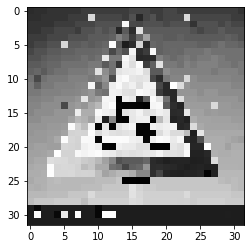

In [29]:
import requests
from PIL import Image

urls = ["https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg","https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg","https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/64914157-german-road-sign-slippery-road.jpg","https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-german-traffic-sign-no-205-give-way.jpg","https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg"]

for i in range(len(urls)):
    url = urls[i]

    r = requests.get(url, stream=True)
    img = Image.open(r.raw)
    plt.imshow(img, cmap=plt.get_cmap('gray'))
    
    
    #Preprocess image
    
    img = np.asarray(img)
    img = cv2.resize(img, (32, 32))
    img = preprocessing(img)
    plt.imshow(img, cmap = plt.get_cmap('gray'))
    
    #Reshape reshape
    
    img = img.reshape(1, 32, 32, 1)
    
    #Test image
    print("({}). predicted sign: ".format(i+1)+ str(model.predict_classes(img)))

In [30]:
#End of Notebook